In [1]:
# this is the notebook where I make MRL curves from the 1k EOSs produced in 'Create_EOS_sets'
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [16]:
import TOVsolver
import test_TOVsolver
max_p = 2000 #MeV/fm^3
size = 50

In [7]:
cs5_test = np.load('../data/cs5test.npy')
start=time.time()
MRL = TOVsolver.solve(cs5_test, max_p, size=size)
#MRL_test = test_TOVsolver.solve(cs5_test, max_p)
print(time.time()-start)

9.57625699043274


In [ ]:
import solver

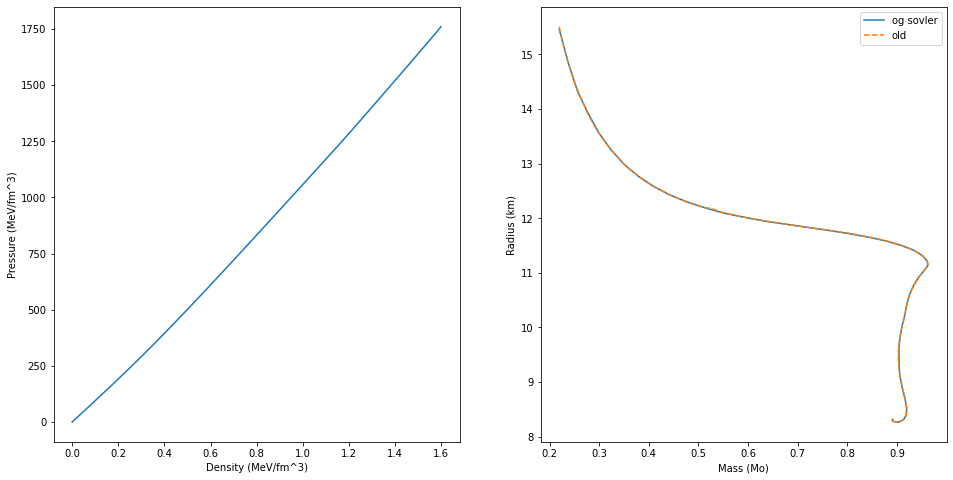

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

olddata = np.loadtxt('../data/test.dat')

ax[0].plot(cs5_test[:,0], cs5_test[:,2])
ax[0].set_xlabel('Density (MeV/fm^3)')
ax[0].set_ylabel('Pressure (MeV/fm^3)')

ax[1].plot(MRL[:,0], MRL[:,1], label='og sovler')
ax[1].plot(olddata[:,0], olddata[:,1], label='old', linestyle='--')
# ax[1].plot(MRL_test[:,0], MRL_test[:,1], label='test solver')
ax[1].set_xlabel('Mass (Mo)')
ax[1].set_ylabel('Radius (km)')
ax[1].legend()

In [17]:
cs5EOS = np.load('../data/cs5EOS.npy')
nsim = cs5EOS.shape[2]

cs5MRL = np.zeros((size,MRL.shape[1],nsim))

In [19]:
for i in range(nsim):
    cs5MRL[:,:,i] = TOVsolver.solve(cs5EOS[:,:,i], max_p, size)

In [20]:
np.save('../data/cs5MRL', cs5MRL)

In [23]:
poly5EOS = np.load('../data/poly5EOS.npy')
nsim = poly5EOS.shape[2]

poly5MRL = np.zeros((size,MRL.shape[1],nsim))

In [24]:
for i in range(nsim):
    poly5MRL[:,:,i] = TOVsolver.solve(poly5EOS[:,:,i], max_p, size)

In [25]:
np.save('../data/poly5MRL', poly5MRL)